# Data Scientist Professional Practical Exam Submission
**By Bnina Ayoub**

## Data Validation
***The original data is 947 rows and 8 columns, After validation there were 924 rows remaining, I started with exploring the shape of the dataset.I checked for the missing values threshold to consider imputing with the mean, I stored the `Lunch/Snacks` rows into a new dataframe and split them into separated values, I concatenated the two dataframes and fixed the both category & servings values.***


***Finally, I dropped duplicate records for the entire subset while keeping the original occurrences for each unique row***

***The following describes what I did to each column:***

- **`recipe`** : Numeric, unique identifier of recipe, After splitting the value Lunch/Snack I dropped 3 generated duplicates

- **`Calories`** : Numeric, Values range from 0.14 to 3633.16, imputed 21 missing values with the mean (float)

- **`Carbohydrate`** : Values range from 0.03 to 530.42, 52 imputed missing values with the mean (float)

- **`Sugar`** : Values range from 0.01 to 148.75, imputed 52 missing values with the mean (float)

- **`Protein`** : Values range from 0 to 363.36, imputed 52 missing values with the mean (float)

- **`Category`** : There are 12 unique category, I split the value 'Lunch/Snacks' in the category column to separate values and performed the necessary changes : (Object) converted to (Category)

- **`Servings`** : Contains 4 unique values after replacing 3 erroneous values containing 'as a snack' with the adequate number: (object) converted to (int)

- **`high_traffic`** : There were 373 missing values, Considered as non high traffic therefore switched to 'Moderate' as it is the target column. We have 2 traffic state High/Moderate : (object) converted to (category)



***Importing packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

***Assessing & Cleaning Data***

In [2]:
df_orig = pd.read_csv('recipe_site_traffic_2212.csv')

In [3]:
df_orig.shape

(947, 8)

In [4]:
df_orig.sample(5)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
492,493,14.96,37.05,15.71,0.01,Beverages,4,NaN
379,380,75.89,22.51,8.18,17.64,Meat,6,High
686,687,975.90,10.81,3.04,60.25,Chicken Breast,4,NaN
371,372,259.95,18.93,5.08,0.33,Vegetable,6,High
728,729,818.53,4.97,1.25,31.59,Lunch/Snacks,4,High


In [5]:
df_orig.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [6]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [7]:
df_orig.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [8]:
df_orig.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [9]:
df_orig['recipe'].nunique()

947

In [10]:
# Creating a copy
df = df_orig.copy()

In [11]:
df[df.duplicated(subset=['calories', 'protein', 'sugar', 'carbohydrate','servings','category'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
89,90,NaN,NaN,NaN,NaN,Pork,6,High
209,210,NaN,NaN,NaN,NaN,Dessert,2,High
351,352,NaN,NaN,NaN,NaN,Potato,4,High
354,355,NaN,NaN,NaN,NaN,Pork,4,High
376,377,NaN,NaN,NaN,NaN,Pork,6,High
388,389,NaN,NaN,NaN,NaN,Lunch/Snacks,4,High
427,428,NaN,NaN,NaN,NaN,Vegetable,4,High
455,456,NaN,NaN,NaN,NaN,Pork,6,High
538,539,NaN,NaN,NaN,NaN,Vegetable,4,High
545,546,NaN,NaN,NaN,NaN,Chicken Breast,6,High


In [12]:
df = df.drop_duplicates(subset=['calories', 'protein', 'sugar', 'carbohydrate','servings','category'])

In [13]:
#Calculating missing values threshold for 5%
threshold = len(df) *0.05
threshold

46.050000000000004

In [14]:
#Checking for columns with missing values less than our threshhold to drop
cols_to_drop = df.columns[(df.isna().sum() <= threshold) & (df.isna().sum() != 0)]
cols_to_drop

Index(['calories', 'carbohydrate', 'sugar', 'protein'], dtype='object')

**No Missing values to be dropped, Therefore Imputing**

In [15]:
df[df[['calories','carbohydrate','sugar','protein']].isnull().any(axis=1)]['category'].unique()

array(['Pork', 'Meat', 'Chicken Breast', 'Dessert', 'One Dish Meal',
       'Potato', 'Chicken', 'Lunch/Snacks', 'Vegetable'], dtype=object)

In [16]:
# Calculating the mean for each category
category_means = df.groupby('category').mean()

# Iterating through the categories having missing values and imputing with the corresponding category mean
null_cat = ['Pork', 'Meat', 'Chicken Breast', 'Dessert', 'One Dish Meal',
       'Potato', 'Chicken', 'Lunch/Snacks', 'Vegetable']
for category in null_cat:
    is_category = df['category'] == category
    df.loc[is_category, 'calories'] = df.loc[is_category, 'calories'].fillna(category_means.loc[category, 'calories'])
    df.loc[is_category, 'protein'] = df.loc[is_category, 'protein'].fillna(category_means.loc[category, 'protein'])
    df.loc[is_category, 'carbohydrate'] = df.loc[is_category, 'carbohydrate'].fillna(category_means.loc[category, 'carbohydrate'])
    df.loc[is_category, 'sugar'] = df.loc[is_category, 'sugar'].fillna(category_means.loc[category, 'sugar'])


In [17]:
# Checking for duplicate record
df.isna().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    368
dtype: int64

In [18]:
# Imputing null values for the target variable
df['high_traffic'].fillna('Moderate', inplace = True)

In [19]:
# Checking if all values are valid
df['high_traffic'].isin(['High','Moderate']).any()

True

In [20]:
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [21]:
df['category'].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [22]:
df['category'].value_counts()

Breakfast         106
Chicken Breast     96
Beverages          92
Potato             86
Lunch/Snacks       84
Vegetable          81
Dessert            81
Meat               77
Pork               76
Chicken            73
One Dish Meal      69
Name: category, dtype: int64

In [23]:
df['servings'].value_counts()

4               374
6               189
2               180
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [24]:
# Checking how many rows contains invalid servings values
df_join = df[df['servings'].str.endswith('as a snack')]
df_join

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,Moderate


In [25]:
#Splitting the lunch/Snacks value

import itertools
def concat(ch):
    return list(itertools.chain.from_iterable(ch.str.split('/')))


lengths = df_join['category'].str.split('/').map(len)


#Creating a new dataframe with splitted rows


df_join = pd.DataFrame({'recipe' : np.repeat(df_join['recipe'], lengths),
                   'calories': np.repeat(df_join['calories'], lengths),
                   'carbohydrate' : np.repeat(df_join['carbohydrate'], lengths),
                   'sugar' : np.repeat(df_join['sugar'], lengths),
                   'protein' : np.repeat(df_join['protein'], lengths),
                   'category' : concat(df_join['category']),
                   'servings' : np.repeat(df_join['servings'], lengths),
                   'high_traffic': np.repeat(df_join['high_traffic'], lengths)})

In [26]:
# Keeping only the Snacks rows
df_join = df_join[df_join['category'] == 'Snacks']
df_join

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Snacks,4 as a snack,Moderate


In [27]:
# Concatenating the two dataframes
df = pd.concat([df, df_join], axis = 0)

In [28]:
df[df['servings'].str.endswith('as a snack')]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,Moderate
451,452,1542.53,14.73,5.71,29.92,Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Snacks,4 as a snack,Moderate


In [29]:
# Checking for the Snacks values
df.query('category == "Snacks"')

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Snacks,4 as a snack,Moderate


In [30]:
# Cleaning servings column to perform a valid casting
df['servings'] = df['servings'].replace('4 as a snack', 4)
df['servings'] = df['servings'].replace('6 as a snack', 6)

In [31]:
# Switch all Lucnh/Snacks values to Lunch
df['category'] = df['category'].replace('Lunch/Snacks', 'Lunch')

In [32]:
# Fixing erroneous data types
df['category'] = df['category'].astype('category')
df['servings'] = df['servings'].astype(int)
df['high_traffic'] = df['high_traffic'].astype('category')

In [33]:
df['servings'].value_counts()

4    378
6    191
2    180
1    175
Name: servings, dtype: int64

In [34]:
df['high_traffic'].unique()

['High', 'Moderate']
Categories (2, object): ['High', 'Moderate']

<AxesSubplot: >

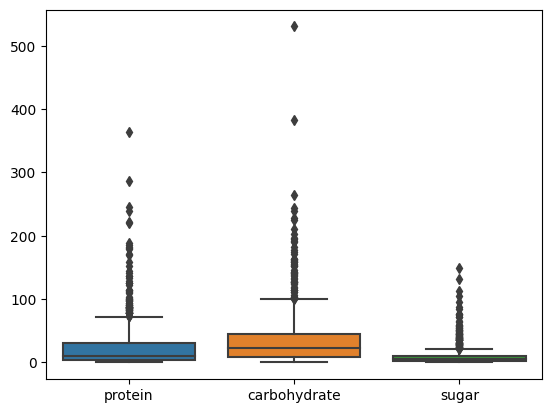

In [35]:
sns.boxplot(data =df[['protein', 'carbohydrate', 'sugar']])

In [254]:
df[df.duplicated(subset = 'recipe', keep = False)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch,4,High
548,549,1440.69,30.59,5.78,30.63,Lunch,6,High
735,736,513.75,65.87,18.63,18.39,Lunch,4,Moderate
451,452,1542.53,14.73,5.71,29.92,Snacks,4,High
548,549,1440.69,30.59,5.78,30.63,Snacks,6,High
735,736,513.75,65.87,18.63,18.39,Snacks,4,Moderate


In [255]:
df = df.drop_duplicates(subset = 'recipe', keep = 'last')

In [256]:
#Dropping the duplicated records and resetting the index
df.duplicated(subset=['calories', 'protein', 'sugar', 'carbohydrate','servings','category']).sum()

0

In [258]:
df = df.drop_duplicates(subset=['calories', 'protein', 'sugar', 'carbohydrate','servings','category'])

In [259]:
df[df['recipe'].isin([1,24])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.71,28.08,8.04,43.80,Pork,6,High
23,24,584.53,22.16,5.81,40.38,Meat,2,Moderate


In [260]:
df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.drop('index', inplace = True, axis = 1)

In [261]:
df[df['category'] == 'Snacks']

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
918,452,1542.53,14.73,5.71,29.92,Snacks,4,High
919,549,1440.69,30.59,5.78,30.63,Snacks,6,High
920,736,513.75,65.87,18.63,18.39,Snacks,4,Moderate


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        921 non-null    int64   
 1   calories      921 non-null    float64 
 2   carbohydrate  921 non-null    float64 
 3   sugar         921 non-null    float64 
 4   protein       921 non-null    float64 
 5   category      921 non-null    category
 6   servings      921 non-null    int64   
 7   high_traffic  921 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 45.6 KB


## Exploratory Analysis
**In my exploratory data analysis, I conducted several steps to better understand the characteristics of the data. After exploring the distribution of continuous & categorical variables, I found that:**


* **After scaling the histogram, Most calories values falls between 300 and 1000**

* **The sugar variable has a bimodal histogram with two peaks around 2 and 8.**

* **Pairplot visualization showed weak correlations between all the continuous variables.**
    
* **The boxplot revealed that the dessert category has the highest sugar rate.**
    
* **The pie plot shows that 60.1% of the recipes have high traffic.**
    
* **The barplot demonstrated that recipes with high traffic have more servings compared to those with a moderate traffic, with a difference of 622.**
    
* **Further, the scaling of carbohydrates, sugar, and protein variables showed that, in addition to high calories, recipes with proportionally balanced calories, carbohydrate, sugar, and protein rates tend to have high traffic.**

* **The stacked barplot reveals that Snacks is having a high calories rate while beverages having a null protein rate.**
    
* **Finally, the pivot table was used to examine the range of each nutrient of the top 2 category recipes with high servings.**

In [263]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [264]:
# Picking a unique color to use in univariate visualization
color = sns.color_palette()[9]

In [265]:
#Scaling the calories varibale for a better understanding
np.log(df['calories']).describe()

count   921.00
mean      5.47
std       1.35
min      -1.97
25%       4.73
50%       5.69
75%       6.38
max       8.20
Name: calories, dtype: float64

In [266]:
# Logarithmic Scale Transformation Function
def scaledist(df, col, m, n, p, lim, title, xl, yl):
    bins = 10 ** np.arange(m, n+p, p)
    ticks = [0.01 ,0.5, 1, 5, 10, 50,100,500, 1000, 5000]
    labels = ['{}'.format(v) for v in ticks]
    plt.hist(data=df , x = col, bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlim((0.1,lim))
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show();

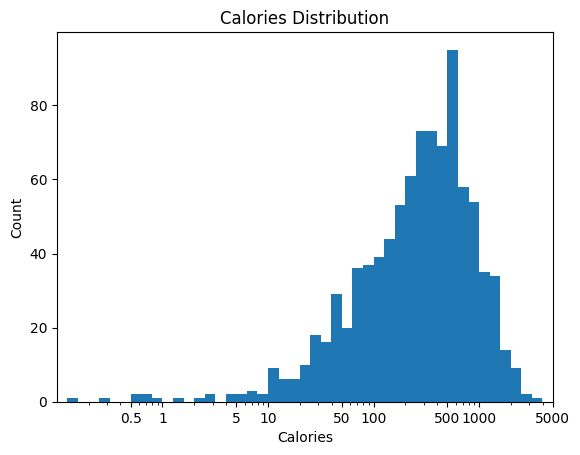

In [267]:
scaledist(df,'calories',-1,8,0.1,5000, 'Calories Distribution', 'Calories', 'Count')

**We notice a right-skewed histogram, Most values fall between 300 and 1000, as we can see the peak is around 500**

In [268]:
np.log(df['sugar']).describe()

count   921.00
mean      1.38
std       1.39
min      -4.61
25%       0.54
50%       1.55
75%       2.28
max       5.00
Name: sugar, dtype: float64

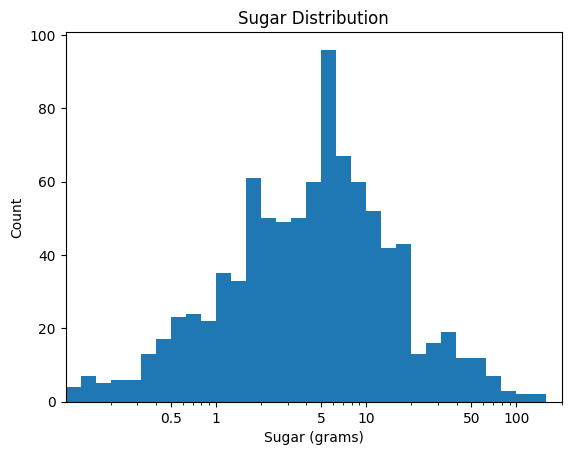

In [269]:
scaledist(df,'sugar',-4.5, 6, 0.1, 200,'Sugar Distribution', 'Sugar (grams)', 'Count')

**We notice a bimodal histogram with two peak respectively around 2 and 8**

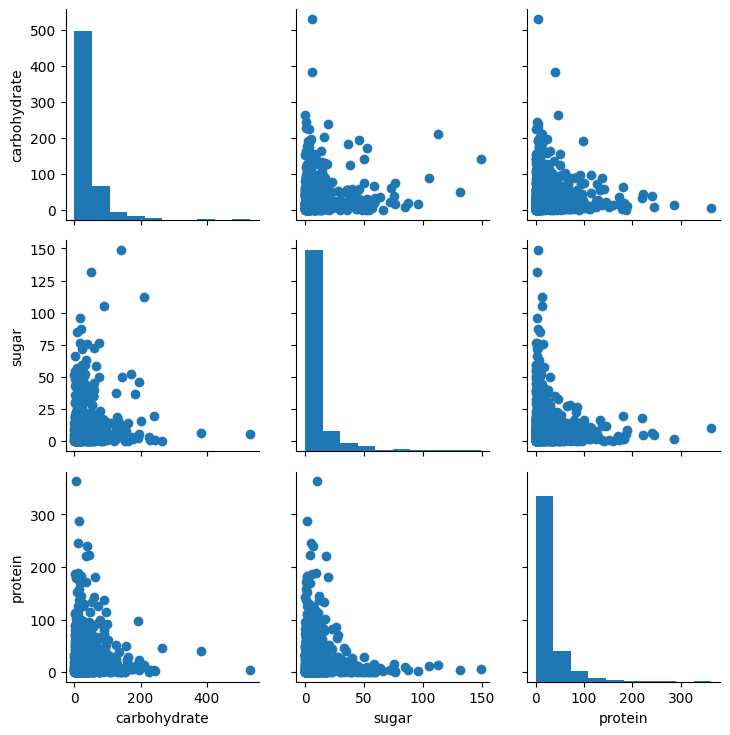

In [270]:
ax = sns.PairGrid(data =df.iloc[:, 2:6])
ax.map_offdiag(plt.scatter)
ax.map_diag(plt.hist);

**All continuous variables have weak correlations with each others**

Text(0.5, 1.0, 'Sugar distribution per category')

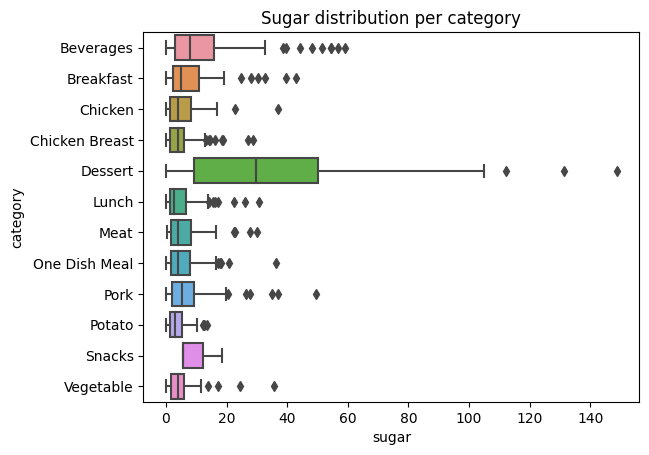

In [271]:
sns.boxplot(data =df, x='sugar', y = 'category')
plt.title('Sugar distribution per category')

**The dessert is the highest category in terms of sugar rate**

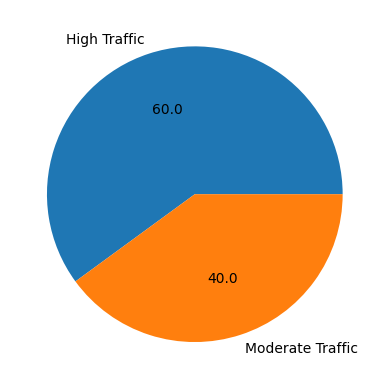

In [272]:
plt.pie(df['high_traffic'].value_counts(), autopct = '%.1f', labels = ['High Traffic', 'Moderate Traffic']);

**Our dataset contains 60.1% of high traffic recipes**

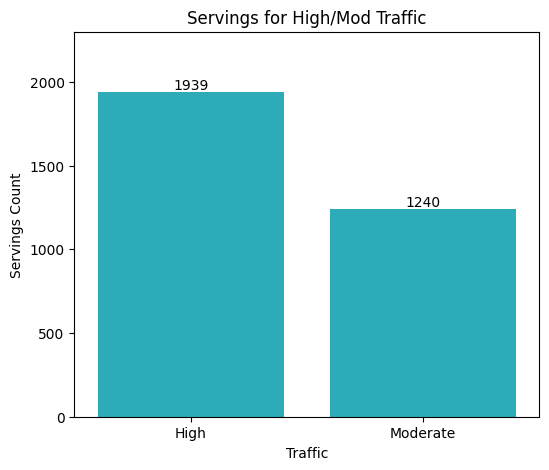

In [273]:
plt.figure(figsize = (6,5))
cal = df.groupby('high_traffic')['servings'].sum()
ax = sns.barplot(x = cal.index , y = cal, color = color)
plt.title("Servings for High/Mod Traffic")
plt.xlabel("Traffic")
plt.ylabel("Servings Count")
plt.ylim((0,2300))

for i in ax.containers:
    ax.bar_label(i,)

**This barplot shows that recipes with high traffic have the most servings count than those with a moderate one**

In [274]:
df[df["high_traffic"] == 'High'][['carbohydrate','sugar','protein','calories']]

,carbohydrate,sugar,protein,calories
0,28.08,8.04,43.80,629.71
1,38.56,0.66,0.92,35.48
3,30.56,38.63,0.02,97.03
5,3.46,1.65,53.93,691.15
8,3.78,3.37,3.79,538.52
...,...,...,...,...
913,83.94,1.98,22.40,186.21
915,29.42,3.57,13.87,951.74
916,35.77,0.97,8.07,266.61
918,14.73,5.71,29.92,1542.53


In [275]:
#Scaling 'carbohydrate','sugar','protein' columns for better understanding
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_org = df[df["high_traffic"] == 'High'][['carbohydrate','sugar','protein','calories']].copy()
df_org['carbohydrate'] = scaler.fit_transform(df_org[['carbohydrate']].values)
df_org['sugar'] = scaler.fit_transform(df_org[['sugar']].values)
df_org['protein'] = scaler.fit_transform(df_org[['protein']].values)
df_org['calories'] = scaler.fit_transform(df_org[['calories']].values)

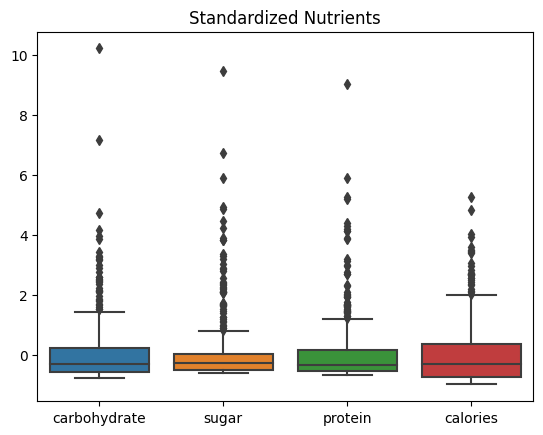

In [276]:
sns.boxplot(data = df_org);
plt.title('Standardized Nutrients');

**High traffic recipes have proportionally a balance of carbohydrate, sugar, calories and protein rate**

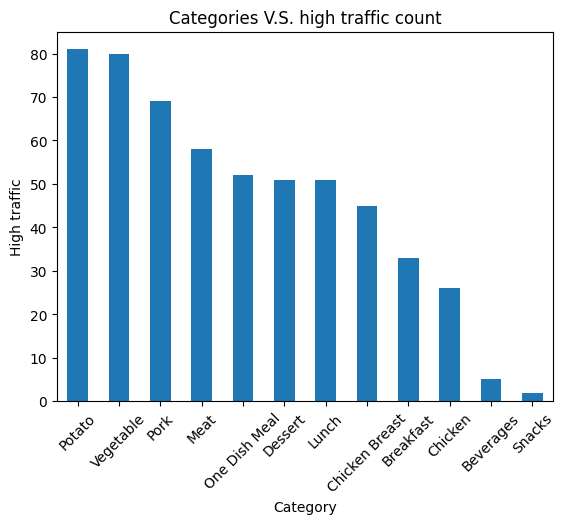

In [277]:
df[df['high_traffic'] == 'High']['category'].value_counts().plot(kind='bar')
plt.title("Categories V.S. high traffic count")
plt.ylabel('High traffic')
plt.xlabel('Category')
plt.xticks(rotation=45);

**Vegetable and potato recipes have the highest high traffic count**

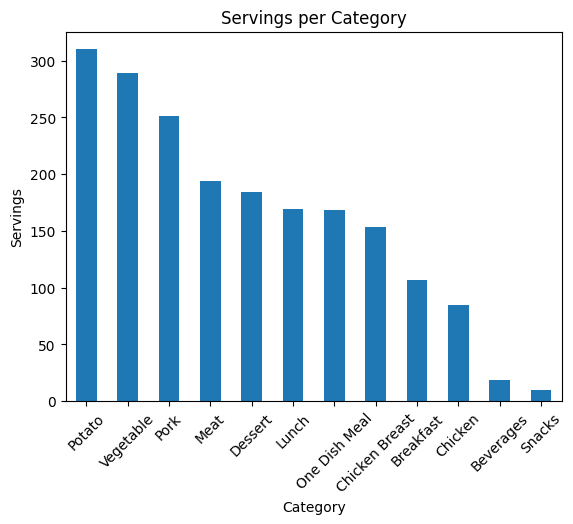

In [278]:
df[df['high_traffic'] == 'High'].groupby('category')['servings'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Servings per Category")
plt.ylabel('Servings')
plt.xlabel('Category')
plt.xticks(rotation=45);

**Potato and Vegetable are the top 2 categories with high servings count > 250**

In [279]:
df.groupby(df['category'])['protein', 'sugar', 'carbohydrate','calories'].mean()

,protein,sugar,carbohydrate,calories
category,,,,
Beverages,0.59,12.54,15.96,177.73
Breakfast,16.96,7.55,39.71,331.88
Chicken,41.84,5.68,30.75,566.73
Chicken Breast,52.16,5.10,21.83,540.34
Dessert,5.76,35.23,55.66,351.40
Lunch,19.36,5.13,43.03,453.41
Meat,40.38,5.81,22.16,584.53
One Dish Meal,35.93,6.01,50.38,579.09
Pork,43.80,8.04,28.08,629.71


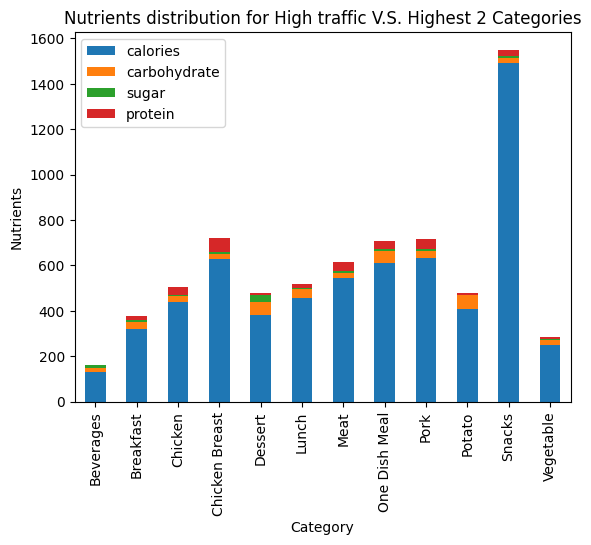

In [280]:
df_hg = df[df['high_traffic'] == 'High']

grouped_hg = df_hg.groupby('category')[['calories', 'carbohydrate', 'sugar', 'protein']].mean()
ax = grouped_hg.plot(kind='bar', stacked=True)

# Setting the title and labels
ax.set_title('Nutrients distribution for High traffic V.S. Highest 2 Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Nutrients')
plt.show()

**We can notice that snacks is having a high calories rate while beverages having null protein rate**

In [281]:
categories = ['Potato', 'Vegetable']
df_hg = df[(df['high_traffic'] == 'High') & (df['category'].isin(categories))]
def cat_range(nutr, title):
    grouped_hg = df_hg.groupby('category')[[nutr]].mean().sort_values(by=nutr)
    ax = grouped_hg.plot(kind='box')
    plt.title(title)

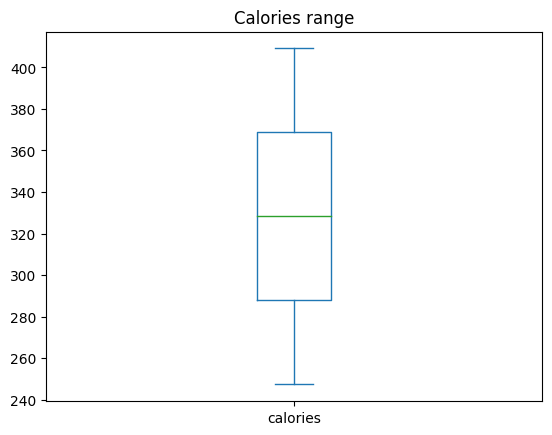

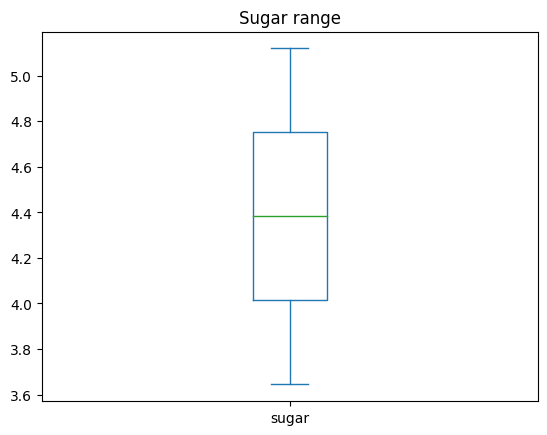

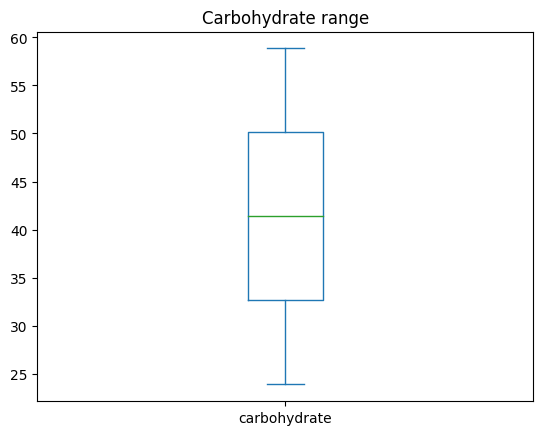

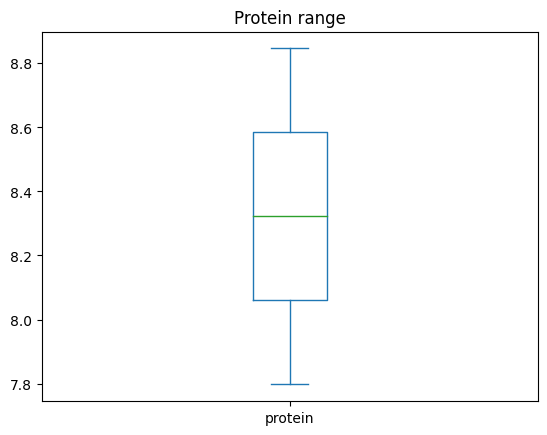

In [282]:
cat_range('calories', 'Calories range')
cat_range('sugar', 'Sugar range')
cat_range('carbohydrate', 'Carbohydrate range')
cat_range('protein', 'Protein range')

In [283]:
print('Nutrients Range', end='\n')
print(df.query("high_traffic == 'High' & category.isin(['Potato', 'Vegetable'])").pivot_table(values = ['calories','protein','sugar','carbohydrate']
                                               , columns ='category'))

Nutrients Range
category      Potato  Vegetable
calories      409.09     247.31
carbohydrate   58.84      23.90
protein         8.85       7.80
sugar           3.64       5.12


## Model Development

***In this study, I aimed to predict whether a recipe would have high traffic or not. To accomplish this binary classification task, I utilized both logistic regression and decision tree models. Logistic regression is a simple and interpretable model that is often used as a baseline for binary classification tasks, and can handle both linear and non-linear decision boundaries. Decision trees, on the other hand, are simple to understand and interpret, and can handle both categorical and numerical data. Additionally, decision tree's visual representation of the decision making process can be beneficial for interpreting the results of the model. Both models have been widely used in similar problems, hence I have chosen the as a comparison models to evaluate the performance of the problem.***

## Features Encoding

In [284]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,629.71,28.08,8.04,43.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Moderate
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Moderate


In [285]:
# Mapping the dependent variable
df['high_traffic'] = df['high_traffic'].map({'High': 1, 'Moderate' : 0})

In [286]:
df['high_traffic'] = df['high_traffic'].astype('category')

In [287]:
One_hot = pd.get_dummies(df['category'])
df.drop('category', axis = 1, inplace = True)
df = df.join(One_hot)

In [288]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'servings',
       'high_traffic', 'Beverages', 'Breakfast', 'Chicken', 'Chicken Breast',
       'Dessert', 'Lunch', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Snacks',
       'Vegetable'],
      dtype='object')

In [289]:
X = df.drop(columns=['high_traffic', 'recipe'])
y = df['high_traffic'].values

In [290]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

# Lazy Predict

In [291]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 10.75it/s]


In [292]:
print(models)

                               Accuracy  ...  Time Taken
Model                                    ...            
LinearSVC                          0.79  ...        0.11
LogisticRegression                 0.79  ...        0.01
BernoulliNB                        0.79  ...        0.01
CalibratedClassifierCV             0.79  ...        0.21
SVC                                0.79  ...        0.02
RidgeClassifierCV                  0.79  ...        0.18
RidgeClassifier                    0.79  ...        0.01
LinearDiscriminantAnalysis         0.79  ...        0.10
QuadraticDiscriminantAnalysis      0.77  ...        0.01
NuSVC                              0.79  ...        0.12
NearestCentroid                    0.78  ...        0.08
GaussianNB                         0.75  ...        0.01
RandomForestClassifier             0.76  ...        0.17
AdaBoostClassifier                 0.76  ...        0.09
ExtraTreesClassifier               0.75  ...        0.14
KNeighborsClassifier           

## Logistic Regression

In [293]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [294]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [295]:
y_pred = lg.predict(x_test)

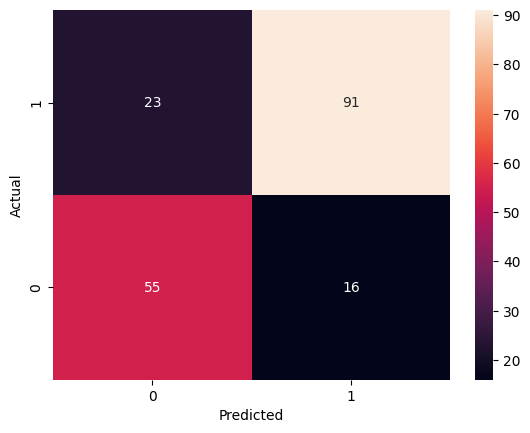

In [296]:
cfs_mx = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames=['Predicted'])
sns.heatmap(cfs_mx, annot=True);

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        71
           1       0.85      0.80      0.82       114

    accuracy                           0.79       185
   macro avg       0.78      0.79      0.78       185
weighted avg       0.79      0.79      0.79       185



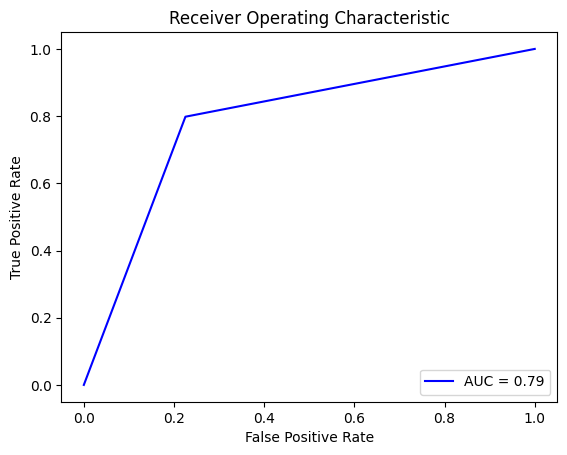

In [298]:
from sklearn.metrics import roc_curve, auc

# Computing FPR, TPR and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Classifier


In [299]:
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(x_train, y_train)

# Predict on the test data
y_pred2 = rf.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7891891891891892


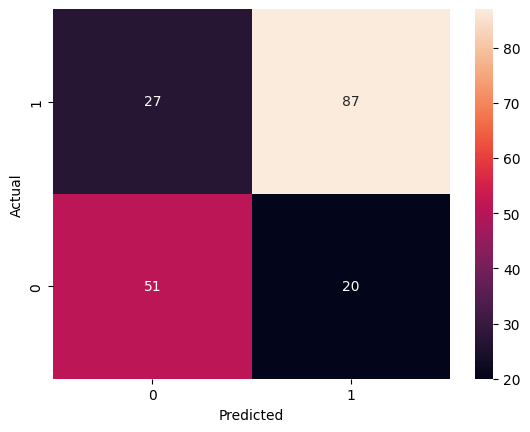

In [300]:
cfs_mx = pd.crosstab(y_test, y_pred2, rownames = ['Actual'], colnames=['Predicted'])
sns.heatmap(cfs_mx, annot=True);

In [301]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        71
           1       0.81      0.76      0.79       114

    accuracy                           0.75       185
   macro avg       0.73      0.74      0.74       185
weighted avg       0.75      0.75      0.75       185



In [302]:
import graphviz
from sklearn.tree import export_graphviz
estimator = rf.estimators_[0]

# Visualize the decision tree using Graphviz
dot_data = export_graphviz(estimator, out_file=None, feature_names= ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken', 'Chicken Breast',
       'Dessert', 'Lunch','Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato',
       'Vegetable'], class_names=['High', 'Moderate'],filled=True, rounded=True,  
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Random_Forest_Decision_Tree")

'Random_Forest_Decision_Tree.pdf'

## Model Evaluation
***it seems that the Random Forest model with a precision of 0.85 would be a better choice for the business goal of increasing traffic to the Tasty Bytes website by accurately predicting recipes that will generate high traffic. The higher precision score suggests that this model is better at correctly identifying recipes that will lead to high traffic, which is exactly what we want to achieve.***


## Buisness Metrics

***Based on the classification report, the Logistic Regression model has achieved a higher precision (85%), recall (78%), and F1 score (81%) compared to the Random Forest model. The Logistic Regression model has also correctly predicted 92 true positives and 54 true negatives, indicating better performance in predicting high traffic recipes. Therefore, in this case, the Logistic Regression model may be considered as a better choice for predicting high traffic recipes and increasing traffic to the Tasty Bytes website, based on the given business goal.***

***These metrics demonstrate our model's effectiveness in identifying recipes that are likely to generate high traffic on our website, which is crucial for maximizing subscriptions and revenue. With such high precision score, we can be confident in our ability to optimize the website's content and recommend recipes that will attract a large number of visitors***

***The significant impact of calories on recipe popularity suggests that they should be monitored too as a key nutrients in recipe development.***

***Overall, the model has the potential to provide valuable insights to the company that can help increase the traffic to the rest of the website and boost the subscription rate as long as our business metric (precision) is satisfied***

## Buisness Focus

**As a final conclusion, it is recommended to**: 

***- Highlight nutrients & recipe that are most attractive to users in order to minimize the showing of unpopular recipes and boost subscription rate.***

***- Focus on Potato & Vegetable recipes that contain a balance of nutrients and a low sugar & calories rate, Preferably that falls in : a calorie range between 254-409, protein 8-9 grams, carbohydrate 24-58 grams, and sugar 4-5 grams..***

***- Create targeted ADS and promotions to attract more visitors to the website.***
    
**These insights will ensure that recipes will be popular among visitors, leading to increased subscription and success for the business.**